Victoria Yong 1004455

To Run, ensure the file directory is as follows
```
> HW1_1004455.ipynb
> HW1_data
    > 1
        > test_1_5.csv
        > train_1_5.csv
    > 2
        > hw1x.dat
        > hw2y.dat
    > 3
        > hw1_ridge_x.dat
        > hw1_ridge_y.dat
        
```
        
Then simply run all cells.

In [1]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Question 2


In [2]:
xpath = os.path.join('HW1_data', '1', 'train_1_5.csv')
ypath = os.path.join('HW1_data', '1', 'test_1_5.csv')
train_data = pd.read_csv(xpath,header=None, names=['symmetry', 'avg_intensity', 'label'])
test_data = data = pd.read_csv(ypath, header=None, names=['symmetry', 'avg_intensity', 'label'])

# train_data.head(20) # label 1.0 for number 1 and -1.0 for number 5

In [3]:
def perceptron(epochs):
    # initialize weight and offset
    weight =np.array([0.0, 0.0])
    offset = 0
    
    # For each instance, classify and check if prediction is correct
    # If incorrect, update weight
    for epoch in range(epochs):
        for i in range(len(train_data)):
            row = train_data.iloc[i, :]
            x = np.array([row.symmetry, row.avg_intensity])
            y = row.label
            
            condition = y * (weight.dot(x) + offset)
            
            if condition <= 0.0:
                # update weight
                weight = np.add(weight, x * y) 
                offset += y

            # Terminate if loss is 0 or epochs are complete
    print(f"Theta: {weight}, Offset: {offset}")
    return [weight, offset]

def perceptron_predict(perceptron):
    weight = perceptron[0]
    offset = perceptron[1]

    x = np.array([test_data.symmetry, test_data.avg_intensity])
    y = np.array(test_data.label)

    # predict
    pred = y * (weight.dot(x) + offset) > 0.0
    correct = sum(pred)

    print(f"accuracy: {correct/len(test_data)}, {correct} out of {len(test_data)} correct predictions")
    return correct/len(test_data)   


## Part a
Run perceptron update rule with offset for 1 epoch

In [4]:
p = perceptron(1)
perceptron_predict(p)

Theta: [-2.4483233  -5.88190688], Offset: 0.0
accuracy: 0.9670658682634731, 969 out of 1002 correct predictions


0.9670658682634731

## Part b
Run perceptron update rule with offset for 5 epoch

In [5]:
p = perceptron(5)
perceptron_predict(p)

Theta: [-2.05895878 -8.83521606], Offset: 1.0
accuracy: 0.9670658682634731, 969 out of 1002 correct predictions


0.9670658682634731

# Question 3 Linear and Polynomial Regression

## Part a
### Linear Regression

In [6]:
xpath = os.path.join('HW1_data', '2', 'hw1x.dat')
ypath = os.path.join('HW1_data', '2', 'hw1y.dat')
rawX = np.genfromtxt(xpath)
y = np.genfromtxt(ypath)

# add row of 1s to make X suitable for dot pdt
X = np.stack((np.ones(shape=rawX.shape), rawX), axis=1)

In [7]:
def plot_graph(preds, title):
    plt.scatter(rawX, y, color='y')
    plt.plot(rawX, preds, color='b')
    plt.title(title)
    plt.show()
    return
    

def closed_linear_regression(X, y):
    # closed form linear regression formula
    # plots regression and data and
    # returns predictions and weight vector, theta, as numpy array
    
    n = X.shape[0]
    
    b = (1/n) * X.T.dot(y)
    A = (1/n) * X.T.dot(X)
    
    theta = np.dot(np.linalg.inv(A), b)
    preds = X.dot(theta)    
    
    return theta, preds


def calculate_mse(preds, y):
    # calculates training error in terms of empirical risk of the resulting fit and reports the error
    # Least Squared Error Loss
    
    diff = y - preds
    cul = np.sum(np.square(diff))
    mse = cul/y.shape[0]
    
    return mse



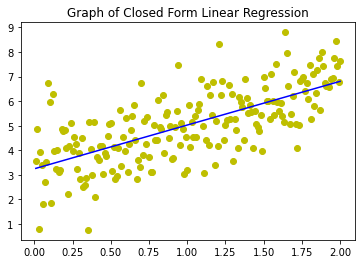

The value of theta is [3.2447227  1.78157138], and the empirical loss is 1.1625211505087876


In [8]:
theta, preds = closed_linear_regression(X, y)
mse = calculate_mse(preds, y)
plot_graph(preds, 'Graph of Closed Form Linear Regression')
print(f"The value of theta is {theta}, and the empirical loss is {mse}")

## Part b
### Gradient Descent

In [9]:
def batch_gd(X, y, epochs=5, lr=0.01):
    print('Batch Gradient Descent\n')
    theta = np.array([0.0, 0.0])
    error = 0
    n = X.shape[0]
    log, mse = [], []   
    
    for epoch in range(epochs):
        
        theta += (lr/n) * (y - X.dot(theta)).dot(X)
        error = calculate_mse(X.dot(theta), y)
        
        mse.append(error)
        log.append(theta)
        print(f"Epoch {epoch}:\nTheta: {theta}, Error: {error}\n")
        
    min_mse = min(mse)
    min_theta = log[mse.index(min_mse)]
    
    # plot graph
    preds = X.dot(min_theta)
    plot_graph(preds, 'Graph of Batch GD')
    
    print(f"BGD RESULTS\nMSE: {min_mse}, Theta: {min_theta}")
    
    return min_mse, min_theta
 
    
    
def sgd(X, y, epochs=5, lr=0.01):
    print("Stochastic Gradient Descent\n")
    theta = np.array([0.0, 0.0])
    error = 0
    n = X.shape[0]
    log, mse = [], []
    for epoch in range(epochs):
        for i in range(n):
            t = random.randrange(0, X.shape[0])

            # update weights
            theta += lr * (y[t] - X[t].dot(theta)) * X[t]
            error = calculate_mse(X.dot(theta), y)

            mse.append(error)
            log.append(theta)
        print(f"Epoch {epoch}:\nTheta: {theta}, Error: {error}\n")

    min_mse = min(mse)
    min_theta = log[mse.index(min_mse)]
    
    # plot graph
    preds = X.dot(min_theta)
    plot_graph(preds, 'Graph of SGD')
    
    print(f"SGD RESULTS\nMSE: {min_mse}, Theta: {min_theta}")
                
    return min_mse, min_theta
    

Batch Gradient Descent

Epoch 0:
Theta: [0.05035202 0.0565422 ], Error: 26.439835388392712

Epoch 1:
Theta: [0.09963227 0.11181881], Error: 25.355034653613437

Epoch 2:
Theta: [0.14786419 0.16585759], Error: 24.317221133337515

Epoch 3:
Theta: [0.1950707  0.21868571], Error: 23.32435829043636

Epoch 4:
Theta: [0.24127422 0.27032973], Error: 22.37449786015696



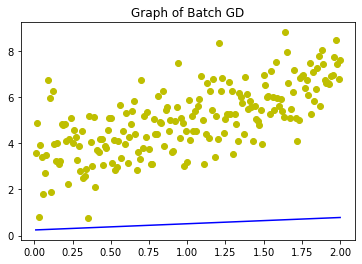

BGD RESULTS
MSE: 22.37449786015696, Theta: [0.24127422 0.27032973]


In [10]:
m = batch_gd(X, y)

Stochastic Gradient Descent

Epoch 0:
Theta: [2.53078852 2.30231245], Error: 1.2892336360858891

Epoch 1:
Theta: [2.62300771 2.16082212], Error: 1.2683366197043886

Epoch 2:
Theta: [2.73352919 2.07162197], Error: 1.2388284324065275

Epoch 3:
Theta: [2.86317986 2.00215439], Error: 1.204293934174676

Epoch 4:
Theta: [3.01663739 1.98010453], Error: 1.176474937031349



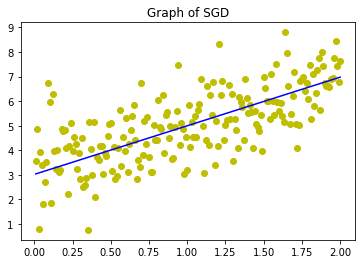

SGD RESULTS
MSE: 1.176474937031349, Theta: [3.01663739 1.98010453]


In [11]:
m = sgd(X, y)

## Part C
### Polynomial Regression

In [12]:
def PolyRegress(rawX, y, d=15):
    log, mse = [], []   
    
    # construct array of powers of X (i.e. col1 = x, col2=x^2, col3=x^3 etc.)
    newX = np.zeros((rawX.shape[0], d+1))
    for i in range(d+1):
        newX[:,i] = rawX ** i
        
    for i in range(1, d+1):
        # get theta for poly eqns starting with order of 1, then moving up incrementally
        X = newX[:,:i+1]
        theta, preds = closed_linear_regression(X, y)
        error = calculate_mse(preds, y)
        print(f"For order of {i} under closed form linear regression:\n\tTheta: {theta}\n\tError: {error}\n")
        log.append(theta)
        mse.append(error)

        plot_graph(preds, f"Polynomial Regression Order of {i}")
        
    min_mse = min(mse)
    min_theta = log[mse.index(min_mse)]
    print(f"\n\nBest Results obtained at Order of {mse.index(min_mse)}:\n\tTheta: {theta}\n\tError: {min_mse}\n")
                
    return min_mse, min_theta
    


For order of 1 under closed form linear regression:
	Theta: [3.2447227  1.78157138]
	Error: 1.1625211505087876



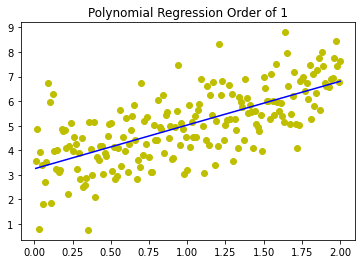

For order of 2 under closed form linear regression:
	Theta: [3.58076915 0.78341361 0.49659591]
	Error: 1.140603224329645



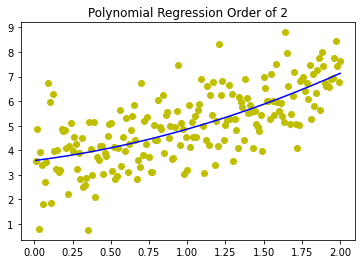

For order of 3 under closed form linear regression:
	Theta: [3.52394943 1.11846512 0.08090267 0.13787504]
	Error: 1.14016887293827



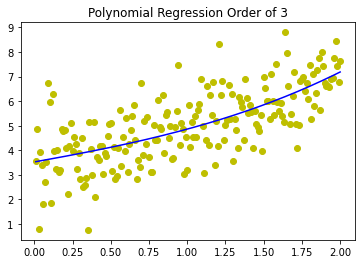

For order of 4 under closed form linear regression:
	Theta: [ 3.85376334 -2.09126966  7.22513464 -5.38187521  1.3730722 ]
	Error: 1.129232775857285



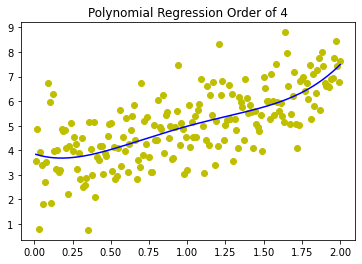

For order of 5 under closed form linear regression:
	Theta: [ 3.7181433  -0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956]
	Error: 1.1277936369498398



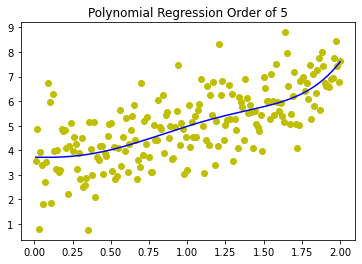

For order of 6 under closed form linear regression:
	Theta: [  3.43194653   5.56010884 -27.43134431  58.72902196 -54.95621235
  23.44890138  -3.72427725]
	Error: 1.122686607780594



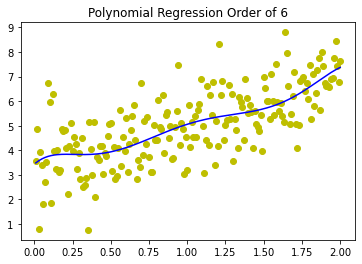

For order of 7 under closed form linear regression:
	Theta: [   2.98164477   17.31147104 -104.72229725  270.37455752 -343.19090271
  229.48686069  -77.69334279   10.51443716]
	Error: 1.1124705031640638



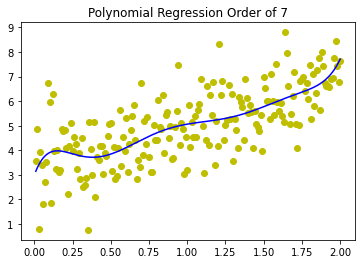

For order of 8 under closed form linear regression:
	Theta: [   2.63576152   28.70146579 -201.17752957  617.80824518 -987.05651152
  893.36511111 -462.31548551  127.58319759  -14.56079078]
	Error: 1.1075611598454387



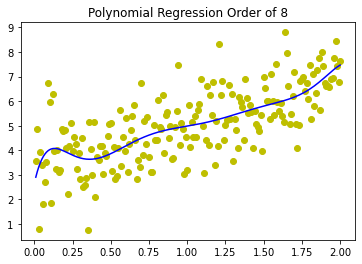

For order of 9 under closed form linear regression:
	Theta: [    2.40918196    37.81840956  -297.5013442   1057.65590668
 -2044.17815208  2358.28455353 -1673.3679924    716.85795307
  -170.20535469    17.20776328]
	Error: 1.1058463484968268



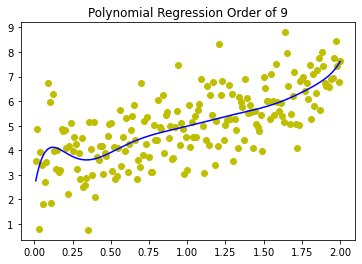

For order of 10 under closed form linear regression:
	Theta: [    2.54128268    30.2723248   -200.54671478   512.37034607
  -402.51757812  -560.90692139  1539.83215332 -1495.71801758
   757.19805908  -199.10487366    21.52225447]
	Error: 1.105379444692622



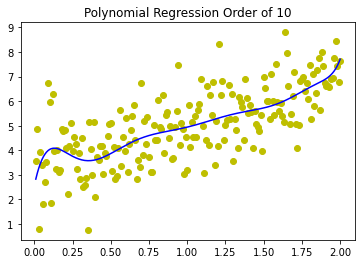

For order of 11 under closed form linear regression:
	Theta: [ 3.08998656e+00 -3.60866699e+01  7.67741699e+02 -5.97776465e+03
  2.33200430e+04 -5.27201953e+04  7.43594844e+04 -6.75715625e+04
  3.95912578e+04 -1.44549395e+04  2.99176807e+03 -2.68114441e+02]
	Error: 1.4846128003081207



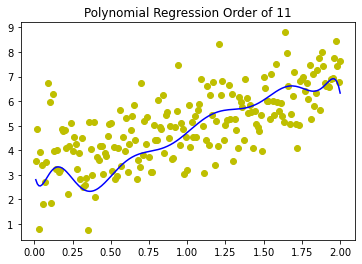

For order of 12 under closed form linear regression:
	Theta: [-5.13089184e+00  8.37421274e+00  1.21985638e+02 -1.33445129e+03
  4.83610693e+03 -7.64007666e+03  2.98472998e+03  8.05296338e+03
 -1.45108542e+04  1.13467748e+04 -4.86841522e+03  1.11547202e+03
 -1.07059749e+02]
	Error: 28.625514937059187



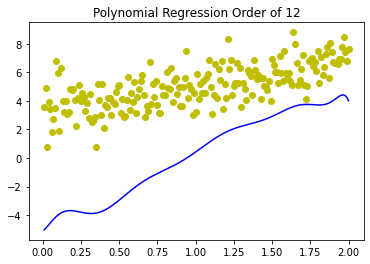

For order of 13 under closed form linear regression:
	Theta: [-8.87540269e+00  5.98889732e+00  4.68247253e+02 -4.00246802e+03
  1.55795547e+04 -3.33505898e+04  4.10450078e+04 -2.63811582e+04
  2.27221875e+03  1.01866289e+04 -8.51689258e+03  3.31385645e+03
 -6.62557404e+02  5.48234177e+01]
	Error: 22.575232959111954



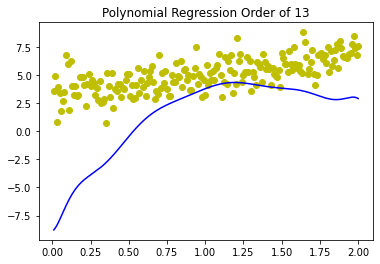

For order of 14 under closed form linear regression:
	Theta: [-1.08529756e+00  4.17876029e+00  4.45248669e+02 -3.88261505e+03
  1.45553011e+04 -2.89492402e+04  3.07827451e+04 -1.25417031e+04
 -7.84515039e+03  1.20992686e+04 -5.19932031e+03 -1.34311523e+01
  7.84723877e+02 -2.64658142e+02  2.91140633e+01]
	Error: 4.390416452200582



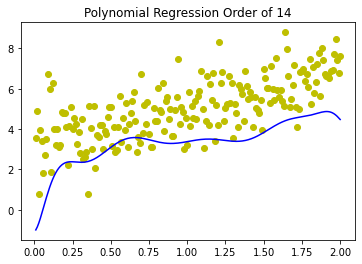

For order of 15 under closed form linear regression:
	Theta: [ 1.15860682e+01  1.72315857e+02  3.05208008e+02 -7.09724219e+03
  3.19521250e+04 -7.68051250e+04  1.11792125e+05 -9.88447500e+04
  4.67055000e+04 -3.03159375e+03 -8.47264844e+03  3.21966797e+03
  7.51669922e+02 -8.61044922e+02  2.39971191e+02 -2.38029175e+01]
	Error: 309.73866275133315



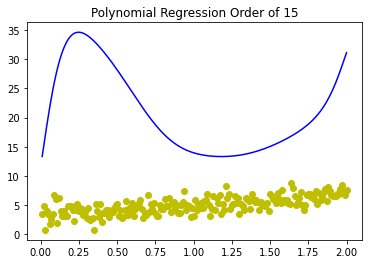



Best Results obtained at Order of 9:
	Theta: [ 1.15860682e+01  1.72315857e+02  3.05208008e+02 -7.09724219e+03
  3.19521250e+04 -7.68051250e+04  1.11792125e+05 -9.88447500e+04
  4.67055000e+04 -3.03159375e+03 -8.47264844e+03  3.21966797e+03
  7.51669922e+02 -8.61044922e+02  2.39971191e+02 -2.38029175e+01]
	Error: 1.105379444692622



In [13]:
m = PolyRegress(rawX, y, 15)

Using polynomial regression, it was observed that the lowest error was obtained at order of 9, with error being 1.105379444692622, after which point the error drastically increased as the regression overfit the data.

# Question 4
## Ridge Regression

In [14]:
xpath = os.path.join('HW1_data', '3', 'hw1_ridge_x.dat')
ypath = os.path.join('HW1_data', '3', 'hw1_ridge_y.dat')
ridgeX = np.genfromtxt(xpath, delimiter=',')
ridgeY = np.genfromtxt(ypath)

vX = ridgeX[:10]
tX = ridgeX[10:]
vY = ridgeY[:10]
tY = ridgeY[10:]

print(vX.shape, vY.shape, tX.shape, tY.shape)

(10, 4) (10,) (40, 4) (40,)


## Part a

In [15]:
def ridgeRegression(tX, tY, l=0.15, v=True):
    n = tX.shape[0]
    
    I = np.eye(tX.shape[1])
    b = tX.T.dot(tY)
    A = (n* l * I) + tX.T.dot(tX)
    
    theta = np.dot(np.linalg.inv(A), b)
    
    if v:
        print(f"Ridge Regression Training Theta for l={l}: {theta} \n")
    return theta

In [16]:
theta = ridgeRegression(tX, tY)

Ridge Regression Training Theta for l=0.15: [-0.57939825  1.15033028  0.04934122 -1.59867896] 



## Part b

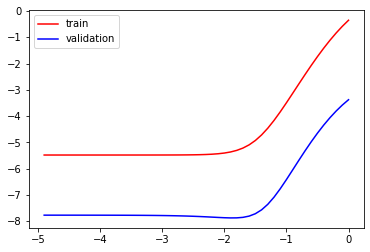

In [17]:
tn = tX.shape[0]
vn = X.shape[0]
tloss, vloss = [], []
index = -np.arange(0, 5, 0.1)

for i in index:
    w = ridgeRegression(tX, tY, 10**i, v=False)
    tloss.append(((tX.dot(w) - tY) ** 2).sum() / tn / 2)
    vloss.append(((vX.dot(w) - vY) ** 2).sum() / vn / 2)
    
plt.plot(index, np.log(tloss), 'r', label='train')
plt.plot(index, np.log(vloss), 'b', label='validation')
plt.legend()
plt.show()